In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
data=pd.read_csv('Position_Salaries.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


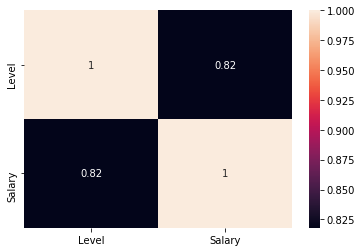

In [5]:
sns.heatmap(data.corr(),annot=True)

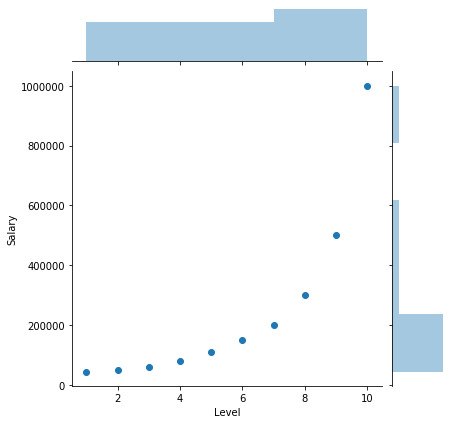

In [8]:
sns.jointplot(x='Level',y='Salary',data=data)

In [10]:
X=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

In [28]:
#converting Y into 2d array
y=y.reshape(-1,1)

In [29]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [30]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [31]:
#Splitting the dataset

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32)

In [47]:
#training the SVR
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [55]:
predict=sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
predict_y=sc_y.inverse_transform(regressor.predict(sc_X.transform(y_test)))

In [56]:
predict

array([ 68599.42219624, 164073.87510693, 146532.06498588])

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test,predict_y)

-7193466876.799772

In [58]:
print(y_test,predict)

[[ 2.64250325]
 [-0.70243757]
 [-0.66722767]] [ 68599.42219624 164073.87510693 146532.06498588]


Text(0.5, 0, 'LEVEL')

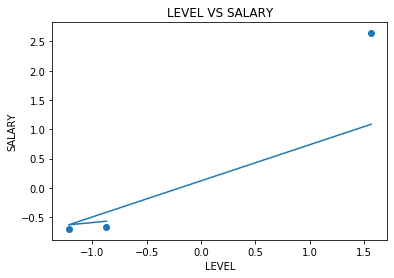

In [37]:
#visualization
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))
plt.title('LEVEL VS SALARY')
plt.ylabel('SALARY')
plt.xlabel('LEVEL')

In [23]:
#the model has permformed worse than polynomial Regression.